In [1]:
# The following is to know when this notebook has been run and with which python version.
import time, sys
print(time.ctime())
print(sys.version.split('|')[0])

Thu Oct 13 16:11:48 2022
3.9.7 (default, Sep 16 2021, 13:09:58) 
[GCC 7.5.0]


In [2]:
import numpy as np

# F Some useful libraries that make life easier

This is part of the Python lecture given by Christophe Morisset at IA-UNAM.

This lecture will give some insights to the most useful python libraries. It is NOT exhaustive, you have to read the corresponding manual pages to find the best use you can have of them. The list of all python-included libraries is here: https://docs.python.org/3/library/

### time, datetime and timeit

*  https://docs.python.org/3/library/time.html
*  https://docs.python.org/3/library/datetime.html

In [3]:
import time
import datetime

In [4]:
print(time.ctime()) # current time, in a string format

Thu Oct 13 16:11:48 2022


In [5]:
lt = time.localtime()
print(lt)

time.struct_time(tm_year=2022, tm_mon=10, tm_mday=13, tm_hour=16, tm_min=11, tm_sec=48, tm_wday=3, tm_yday=286, tm_isdst=1)


In [6]:
time.strftime("%a, %d %b %Y %H:%M:%S",lt)

'Thu, 13 Oct 2022 16:11:48'

In [7]:
print(datetime.datetime.today())

2022-10-13 16:11:48.175468


In [8]:
today = datetime.date.today()
eclipse_total = datetime.date(2024, 4, 8)

In [9]:
time_to_eclipse = eclipse_total - today

In [10]:
if eclipse_total > today:
    print('Eclipse in {} days.'.format(time_to_eclipse.days))
else:
    print('Eclipse {} days ago.'.format(-time_to_eclipse.days))

Eclipse in 543 days.


In [11]:
start = time.time()
for i in np.arange(1000):
    t = np.math.factorial(i)
end = time.time()
print('1000 factorials done in {0:.3f} secs.'.format(end-start))

1000 factorials done in 0.012 secs.


In [12]:
from timeit import Timer
command = """\
for i in np.arange(1000):
    t = np.math.factorial(i)
"""
t = Timer(command, setup='import numpy as np')
print(t.timeit(number=10))

0.11569260900068912


in ipython, one can use the magic timeit function:

In [13]:
%timeit np.math.factorial(50)

365 ns ± 6.34 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


or for the whole cell:

In [14]:
%%timeit
for i in np.arange(1000):
    t = np.math.factorial(i)

8.8 ms ± 224 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


### os

https://docs.python.org/3/library/os.html 
This module provides a portable way of using operating system dependent functionality. If you just want to read or write a file see open(), if you want to manipulate paths, see the os.path module, and if you want to read all the lines in all the files on the command line see the fileinput module. For creating temporary files and directories see the tempfile module, and for high-level file and directory handling see the shutil module.

In [15]:
import os

In [16]:
# os.environ is a dictionnary containing the environment variables and values
if 'HOME' in os.environ:
    print(os.environ['HOME'])
else:
    print('This OS is too limited to understand HOME')

/home/morisset


In [17]:
# if variable doesn't exists, getenv returns None
print(os.getenv('HOMMMMMME'))

None


In [18]:
# get current working directory
cwd = os.getcwd()
print(cwd)
print(cwd.split('/')[-1])

/home/morisset/Python-MySQL/Python-lectures-Notebooks/Notebooks
Notebooks


In [19]:
new_dir = '/tmp/test3457'
if not os.path.exists(new_dir):
    os.mkdir(new_dir)
    print('Dir {} created'.format(new_dir))
else:
    print('Dir {} exists'.format(new_dir))

Dir /tmp/test3457 exists


In [20]:
# list all the files from a directory
os.listdir(new_dir)

[]

In [21]:
os.chdir(new_dir)
os.getcwd()

'/tmp/test3457'

In [22]:
# Renaming files in a directory
os.chdir('/tmp')
for filename in os.listdir('./'):
    #print(filename)
    base_file, ext = os.path.splitext(filename)
    #print(base_file, ext)
    if ext == '.txt':
        newname = base_file + '.exe'
        try:
            os.rename(filename, newname)
            print('file {0} renamed to {1}'.format(filename, newname))
        except:
            print('file {0} NOT renamed'.format(filename))
os.chdir(cwd)

### glob

https://docs.python.org/3/library/glob.html

No tilde expansion is done, but *, ?, and character ranges expressed with [] will be correctly matched.

In [23]:
from glob import glob

In [24]:
os.chdir(cwd)

In [25]:
cwd

'/home/morisset/Python-MySQL/Python-lectures-Notebooks/Notebooks'

In [26]:
ipynb_files = glob('*.ipynb')
print(ipynb_files)

['ANN.ipynb', 'Calling Fortran.ipynb', 'Ex1.ipynb', 'Ex1_done.ipynb', 'Ex1_with_res.ipynb', 'Galaxies_classification.ipynb', 'Interact with files.ipynb', 'OOP.ipynb', 'Optimization.ipynb', 'Parallel.ipynb', 'Redshifts.ipynb', 'Redshifts_ai4neb.ipynb', 'Test-Install.ipynb', 'Useful_libraries.ipynb', 'Using_PyMySQL.ipynb', 'Using_astropy.ipynb', 'Using_astroquery.ipynb', 'intro_Matplotlib.ipynb', 'intro_Python.ipynb', 'intro_Scipy.ipynb', 'intro_numpy.ipynb']


### pathlib

In [27]:
from pathlib import Path

In [31]:
new_dir = Path('/tmp/test1236')
print(new_dir)
print(new_dir.name)
print(new_dir.parent)

/tmp/test1236
test1236
/tmp


In [34]:
new_dir = Path('/tmp') / Path('test1236')
print(new_dir)
print(new_dir.name)
print(new_dir.parent)

/tmp/test1236
test1236
/tmp


In [36]:
if not new_dir.exists():
    new_dir.mkdir() # may use exist_ok=True
    print('Dir {} created'.format(new_dir))
else:
    print('Dir {} exists'.format(new_dir))

Dir /tmp/test1236 exists


In [37]:
current = Path('.')
for f in current.glob('*.ipynb'):
    print(f, f.stem, f.suffix)

ANN.ipynb ANN .ipynb
Calling Fortran.ipynb Calling Fortran .ipynb
Ex1.ipynb Ex1 .ipynb
Ex1_done.ipynb Ex1_done .ipynb
Ex1_with_res.ipynb Ex1_with_res .ipynb
Galaxies_classification.ipynb Galaxies_classification .ipynb
Interact with files.ipynb Interact with files .ipynb
OOP.ipynb OOP .ipynb
Optimization.ipynb Optimization .ipynb
Parallel.ipynb Parallel .ipynb
Redshifts.ipynb Redshifts .ipynb
Redshifts_ai4neb.ipynb Redshifts_ai4neb .ipynb
Test-Install.ipynb Test-Install .ipynb
Useful_libraries.ipynb Useful_libraries .ipynb
Using_PyMySQL.ipynb Using_PyMySQL .ipynb
Using_astropy.ipynb Using_astropy .ipynb
Using_astroquery.ipynb Using_astroquery .ipynb
intro_Matplotlib.ipynb intro_Matplotlib .ipynb
intro_Python.ipynb intro_Python .ipynb
intro_Scipy.ipynb intro_Scipy .ipynb
intro_numpy.ipynb intro_numpy .ipynb


In [39]:
new_dir = Path('/tmp') / Path('test1234')
for f in new_dir.glob('test*.txt*'):
    f.unlink()

f = new_dir / Path('test1234.txt')
f.touch()
f = new_dir / Path('test5678.txt')
f.touch()
print(list(new_dir.glob('test*.txt*')))

for f in new_dir.glob('test*.txt'):
    new_f = f.with_suffix('.txt2')
    if not new_f.exists():
        f.rename(new_f)
    else:
        print('{} exists'.format(new_f))

print(list(new_dir.glob('test*.txt*')))

[PosixPath('/tmp/test1234/test5678.txt'), PosixPath('/tmp/test1234/test1234.txt')]
[PosixPath('/tmp/test1234/test1234.txt2'), PosixPath('/tmp/test1234/test5678.txt2')]


### sys

https://docs.python.org/3/library/sys.html
This module provides access to some variables used or maintained by the interpreter and to functions that interact strongly with the interpreter. It is always available.

The sys.argv list contains the arguments passed to the script, when the interpreter was started. The first item contains the name of the script itself.

In [40]:
%%writefile sys_text.py
import sys
for arg in sys.argv:
    print(arg)


Overwriting sys_text.py


In [41]:
!cat sys_text.py

import sys
for arg in sys.argv:
    print(arg)


In [42]:
! python sys_text.py tralala trololo

sys_text.py
tralala
trololo


In [43]:
%%writefile fact.py
import sys
import numpy as np
print(np.math.factorial(int(sys.argv[1])))

Overwriting fact.py


In [47]:
! python fact.py 60

8320987112741390144276341183223364380754172606361245952449277696409600000000000000


A more complete managment of the argument (especially those like --v) is available using the argparse library. https://docs.python.org/3/library/argparse.html

### Talking to the OS subprocess

The os.popen method is deprecated, subprocess is prefered. A good tutorial is here: http://pymotw.com/3/subprocess/

In [48]:
import subprocess

In [51]:
ls -l

total 57876
-rw-rw-r--. 1 morisset morisset   168746 sep 29 10:37  ANN.ipynb
-rw-rw-r--. 1 morisset morisset    20137 sep 29 10:37 'Calling Fortran.ipynb'
-rw-rw-r--. 1 morisset morisset    86815 sep 29 10:37 'Calling Fortran.pdf'
-rw-rw-r--. 1 morisset morisset 14794880 sep 29 10:37  cosmo-early.npy
-rw-rw-r--. 1 morisset morisset 14794880 sep 29 10:37  cosmo-late.npy
-rw-rw-r--. 1 morisset morisset      298 sep 29 10:37  dcumsum.f
-rw-rw-r--. 1 morisset morisset  3600128 sep 29 10:37  DR9_photo-z-small.npy
-rw-rw-r--. 1 morisset morisset   381664 sep 29 10:37  Ex1_done.ipynb
-rw-rw-r--. 1 morisset morisset     1379 sep 29 10:37  ex1.html
-rw-rw-r--. 1 morisset morisset     7717 sep 29 10:37  Ex1.ipynb
-rw-rw-r--. 1 morisset morisset      154 sep 29 10:37  ex1.py
-rw-rw-r--. 1 morisset morisset        8 sep 29 10:37  ex1.txt
-rw-rw-r--. 1 morisset morisset   315341 sep 29 10:37  Ex1_with_res.ipynb
-rw-rw-r--. 1 morisset morisset       74 oct 13 16:37  fact.py
-rw-rw-r--. 1 morisset mo

In [56]:
var1 = subprocess.call(['ls -l'], shell=True)
# The results is not visible in Notebook. In command line, the files are listed

total 57888
-rw-rw-r--. 1 morisset morisset   168746 sep 29 10:37 ANN.ipynb
-rw-rw-r--. 1 morisset morisset    20137 sep 29 10:37 Calling Fortran.ipynb
-rw-rw-r--. 1 morisset morisset    86815 sep 29 10:37 Calling Fortran.pdf
-rw-rw-r--. 1 morisset morisset 14794880 sep 29 10:37 cosmo-early.npy
-rw-rw-r--. 1 morisset morisset 14794880 sep 29 10:37 cosmo-late.npy
-rw-rw-r--. 1 morisset morisset      298 sep 29 10:37 dcumsum.f
-rw-rw-r--. 1 morisset morisset  3600128 sep 29 10:37 DR9_photo-z-small.npy
-rw-rw-r--. 1 morisset morisset   381664 sep 29 10:37 Ex1_done.ipynb
-rw-rw-r--. 1 morisset morisset     1379 sep 29 10:37 ex1.html
-rw-rw-r--. 1 morisset morisset     7717 sep 29 10:37 Ex1.ipynb
-rw-rw-r--. 1 morisset morisset      154 sep 29 10:37 ex1.py
-rw-rw-r--. 1 morisset morisset        8 sep 29 10:37 ex1.txt
-rw-rw-r--. 1 morisset morisset   315341 sep 29 10:37 Ex1_with_res.ipynb
-rw-rw-r--. 1 morisset morisset       74 oct 13 16:37 fact.py
-rw-rw-r--. 1 morisset morisset    23342 

In [62]:
output = subprocess.check_output(['ls', '-l'])
print(type(output))
print(output)
print(output.decode())

<class 'bytes'>
b'total 57896\n-rw-rw-r--. 1 morisset morisset   168746 sep 29 10:37 ANN.ipynb\n-rw-rw-r--. 1 morisset morisset    20137 sep 29 10:37 Calling Fortran.ipynb\n-rw-rw-r--. 1 morisset morisset    86815 sep 29 10:37 Calling Fortran.pdf\n-rw-rw-r--. 1 morisset morisset 14794880 sep 29 10:37 cosmo-early.npy\n-rw-rw-r--. 1 morisset morisset 14794880 sep 29 10:37 cosmo-late.npy\n-rw-rw-r--. 1 morisset morisset      298 sep 29 10:37 dcumsum.f\n-rw-rw-r--. 1 morisset morisset  3600128 sep 29 10:37 DR9_photo-z-small.npy\n-rw-rw-r--. 1 morisset morisset   381664 sep 29 10:37 Ex1_done.ipynb\n-rw-rw-r--. 1 morisset morisset     1379 sep 29 10:37 ex1.html\n-rw-rw-r--. 1 morisset morisset     7717 sep 29 10:37 Ex1.ipynb\n-rw-rw-r--. 1 morisset morisset      154 sep 29 10:37 ex1.py\n-rw-rw-r--. 1 morisset morisset        8 sep 29 10:37 ex1.txt\n-rw-rw-r--. 1 morisset morisset   315341 sep 29 10:37 Ex1_with_res.ipynb\n-rw-rw-r--. 1 morisset morisset       74 oct 13 16:37 fact.py\n-rw-rw-r

In [63]:
command = 'ls -l'
popen = subprocess.Popen(command, shell=True)
# The same apply here, no output in Notebook
print(popen)

<Popen: returncode: None args: 'ls -l'>
total 57896
-rw-rw-r--. 1 morisset morisset   168746 sep 29 10:37 ANN.ipynb
-rw-rw-r--. 1 morisset morisset    20137 sep 29 10:37 Calling Fortran.ipynb
-rw-rw-r--. 1 morisset morisset    86815 sep 29 10:37 Calling Fortran.pdf
-rw-rw-r--. 1 morisset morisset 14794880 sep 29 10:37 cosmo-early.npy
-rw-rw-r--. 1 morisset morisset 14794880 sep 29 10:37 cosmo-late.npy
-rw-rw-r--. 1 morisset morisset      298 sep 29 10:37 dcumsum.f
-rw-rw-r--. 1 morisset morisset  3600128 sep 29 10:37 DR9_photo-z-small.npy
-rw-rw-r--. 1 morisset morisset   381664 sep 29 10:37 Ex1_done.ipynb
-rw-rw-r--. 1 morisset morisset     1379 sep 29 10:37 ex1.html
-rw-rw-r--. 1 morisset morisset     7717 sep 29 10:37 Ex1.ipynb
-rw-rw-r--. 1 morisset morisset      154 sep 29 10:37 ex1.py
-rw-rw-r--. 1 morisset morisset        8 sep 29 10:37 ex1.txt
-rw-rw-r--. 1 morisset morisset   315341 sep 29 10:37 Ex1_with_res.ipynb
-rw-rw-r--. 1 morisset morisset       74 oct 13 16:37 fact.py
-

In [64]:
popen = subprocess.Popen(command, stdout=subprocess.PIPE, shell=True)
res = popen.communicate()[0]
print(type(res))
print(res.decode())

<class 'bytes'>
total 57896
-rw-rw-r--. 1 morisset morisset   168746 sep 29 10:37 ANN.ipynb
-rw-rw-r--. 1 morisset morisset    20137 sep 29 10:37 Calling Fortran.ipynb
-rw-rw-r--. 1 morisset morisset    86815 sep 29 10:37 Calling Fortran.pdf
-rw-rw-r--. 1 morisset morisset 14794880 sep 29 10:37 cosmo-early.npy
-rw-rw-r--. 1 morisset morisset 14794880 sep 29 10:37 cosmo-late.npy
-rw-rw-r--. 1 morisset morisset      298 sep 29 10:37 dcumsum.f
-rw-rw-r--. 1 morisset morisset  3600128 sep 29 10:37 DR9_photo-z-small.npy
-rw-rw-r--. 1 morisset morisset   381664 sep 29 10:37 Ex1_done.ipynb
-rw-rw-r--. 1 morisset morisset     1379 sep 29 10:37 ex1.html
-rw-rw-r--. 1 morisset morisset     7717 sep 29 10:37 Ex1.ipynb
-rw-rw-r--. 1 morisset morisset      154 sep 29 10:37 ex1.py
-rw-rw-r--. 1 morisset morisset        8 sep 29 10:37 ex1.txt
-rw-rw-r--. 1 morisset morisset   315341 sep 29 10:37 Ex1_with_res.ipynb
-rw-rw-r--. 1 morisset morisset       74 oct 13 16:37 fact.py
-rw-rw-r--. 1 morisset mo

In [67]:
popen = subprocess.Popen(command, stdout=subprocess.PIPE, shell=True)
res = popen.communicate()[0]
for line in res.decode().split('\n'):
    lspl = line.split()
    if len(lspl)> 4:
        if int(lspl[4]) > 1000000:
            print(lspl[8])

cosmo-early.npy
cosmo-late.npy
DR9_photo-z-small.npy
intro_Matplotlib.ipynb
intro_Matplotlib.pdf
Machine
n10017o.fits
swp04345.mxhi


### re

The re module provides regular expression tools for advanced string processing. For complex matching and manipulation, regular expressions offer succinct, optimized solutions:

In [72]:
import re
# Search the words starting with "f"
re.findall(r'\bf[a-z]*', 'whifch foOt or hand fell f fastest')

['fo', 'fell', 'f', 'fastest']

In [73]:
# Remove duplicate words
re.sub(r'(\b[a-z]+) \1', r'\1', 'cat in the the hat')

'cat in the hat'

More in https://docs.python.org/3/library/re.html

### urllib

In [74]:
from urllib.request import urlopen

In [75]:
for line in urlopen('http://dev.on-rev.com/myip.irev'):
    print(line)
    if 'IP' in str(line):
        IP = str(line).split(':')[1][:-7]
print('-------')
print(IP)

b'<html>\n'
b'<body>\n'
b'<p>\n'
b'Remote IP Address:132.248.3.110</p>\n'
b'</body>\n'
b'</html>'
-------
132.248.3.110


### Tables with power: pandas at https://pandas.pydata.org/

In [76]:
import pandas as pd

In [77]:
%%writefile data2.dat
# The following data are for test purpose
N    f   x   y type
1   2.3  6   8 star
2   3.5  7   9 galaxy
3  -4.2  5   7 cluster
#4  -10.5  5  7 test

Writing data2.dat


In [78]:
df = pd.read_csv('data2.dat', comment='#', delim_whitespace=True)

In [79]:
df

,N,f,x,y,type
0,1,2.3,6,8,star
1,2,3.5,7,9,galaxy
2,3,-4.2,5,7,cluster


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   N       3 non-null      int64  
 1   f       3 non-null      float64
 2   x       3 non-null      int64  
 3   y       3 non-null      int64  
 4   type    3 non-null      object 
dtypes: float64(1), int64(3), object(1)
memory usage: 248.0+ bytes


In [81]:
df.describe()

,N,f,x,y
count,3.0,3.000000,3.0,3.0
mean,2.0,0.533333,6.0,8.0
std,1.0,4.142865,1.0,1.0
min,1.0,-4.200000,5.0,7.0
25%,1.5,-0.950000,5.5,7.5
50%,2.0,2.300000,6.0,8.0
75%,2.5,2.900000,6.5,8.5
max,3.0,3.500000,7.0,9.0


In [82]:
df['R'] = np.sqrt(df['x']**2 + df.y**2)

<AxesSubplot:>

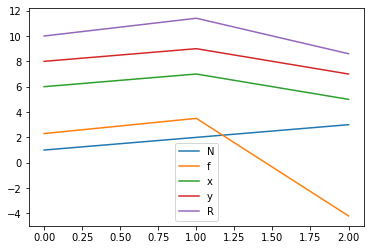

In [83]:
df.plot()

### Plotting with alternative style: seaborn at https://seaborn.pydata.org/

In [84]:
import seaborn as sns

In [87]:
fmri = sns.load_dataset("fmri") # medical data from https://github.com/mwaskom/Waskom_CerebCortex_2017
print(type(fmri))
fmri

<class 'pandas.core.frame.DataFrame'>


,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970
...,...,...,...,...,...
1059,s0,8,cue,frontal,0.018165
1060,s13,7,cue,frontal,-0.029130
1061,s12,7,cue,frontal,-0.004939
1062,s11,7,cue,frontal,-0.025367


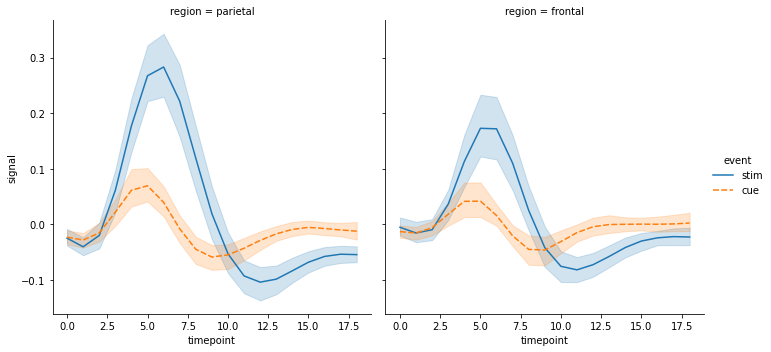

In [88]:
sns.relplot(data=fmri, kind="line",
            x="timepoint", y="signal", col="region",
            hue="event", style="event");